## 1. Plotting to check which cluster size suits the best

Automatically created module for IPython interactive environment
Number of clusters: 2


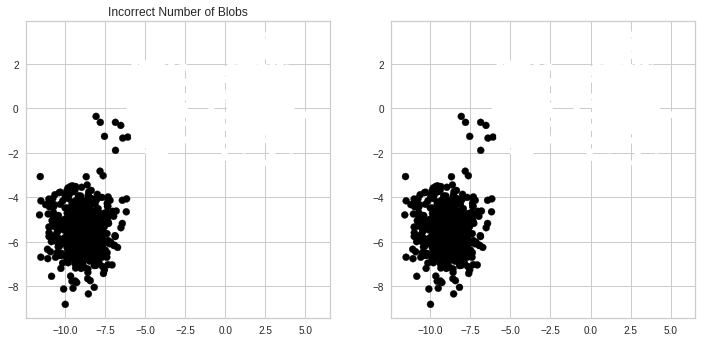

Number of clusters: 3


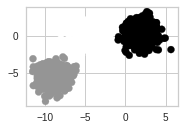

Number of clusters: 4


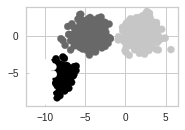

Number of clusters: 5


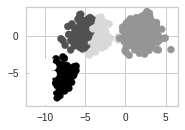

Number of clusters: 6


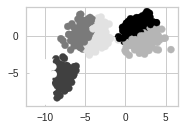

Number of clusters: 7


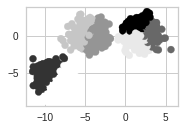

Number of clusters: 8


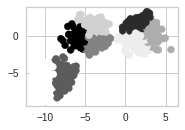

Number of clusters: 9


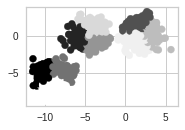

Text(0, 0.5, 'Inertia')

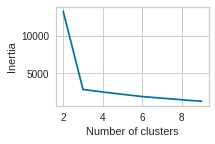

In [15]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np

import matplotlib.pyplot as plt
from yellowbrick.cluster import intercluster_distance
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

inertia = {}
for n in range(2,10):
  print(f"Number of clusters: {n}")
  kmeans = KMeans(n_clusters=n, random_state=random_state)
  y_pred = kmeans.fit_predict(X)

  inertia[n] = kmeans.inertia_
  plt.subplot(222)
  plt.scatter(X[:, 0], X[:, 1], c=y_pred)
  plt.show()

plt.subplot(223)
plt.plot(*zip(*sorted(inertia.items()))) 
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

### As seen above, cluster size = 3 proves to be best size. Also as expexted elbow function forms an elbow at cluster size = 3

### 2. Plotting Intercluster distance with yellowbricks, to check distance between cluster centers

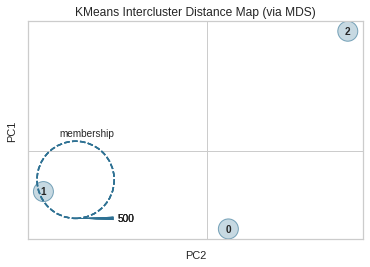

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f10a6481b70>,
                     embedding='mds', legend=True, legend_loc='lower left',
                     legend_size=1.5, max_size=25000, min_size=400, model=None,
                     random_state=None, scoring='membership')

In [11]:
intercluster_distance(KMeans(3, random_state=random_state), X)

### Plotting a Dendogram using AgglomerativeClustering Model

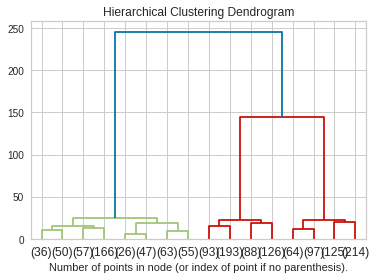

In [12]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### We can get the dendogram at y=50 to get 3 clusters.